# SQL Lab

Congratulations! We've been hired as analysts at Classic Model Car Company, and you've been handed keys to the Data Warehouse.  They want you to hit the ground running with analysis! We have lots of questions to answer.  First, let's connect to the database.

1. Connect via MySQL Credentials
  - hostname: `hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com`
  - username: `hbs-student`
  - password: super-secure-password?
  - port: 3306 (default)
  - database: `classicmodels`

 install MySQL Workbench
https://dev.mysql.com/downloads/workbench/

2. Take a moment to study the schema, noting the keys. Browse the data in each relation if you wish. Answer the following queries. I've given you the expected results below each query.

3. Answer the following questions! Do them in your MySQL client first, most likely, then bring them into Pandas here in this notebook.

In [1]:
#install mysql module
!pip install MySQL-connector-python

In [45]:
import pandas as pd

#create mysql connection
#https://dev.mysql.com/doc/connector-python/en/connector-python-example-connecting.html

import mysql.connector

In [71]:
con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='classicmodels')

#con.close()

In [76]:
print(con)

In [70]:
con.close()

1. List all customer names and their addresses who don't have a specified sales rep. Order by customer name.

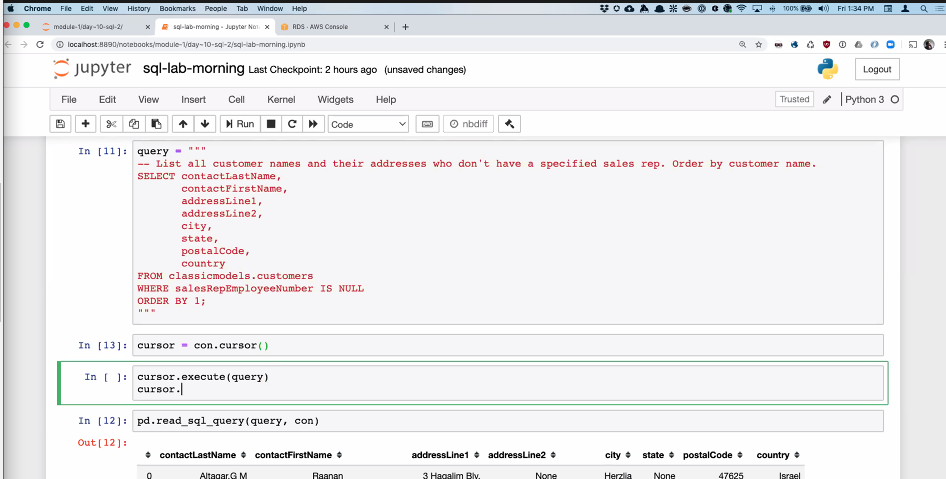

In [34]:
query = """
select contactLastName,
        contactFirstName,
        addressLine1,
        addressLine2,
        city,
        state,
        postalCode
        country
from classicmodels.customers
where salesRepEmployeeNumber is NULL
order by 1;
"""

pd.read_sql_query(query, con)

,contactLastName,contactFirstName,addressLine1,addressLine2,city,state,country
0,"Altagar,G M",Raanan,3 Hagalim Blv.,None,Herzlia,None,47625
1,Andersen,Mel,Obere Str. 57,None,Berlin,None,12209
2,Anton,Carmen,"c/ Gobelas, 19-1 Urb. La Florida",None,Madrid,None,28023
3,Camino,Alejandra,"Gran Vía, 1",None,Madrid,None,28001
4,Cramer,Philip,Maubelstr. 90,None,Brandenburg,None,14776
5,de Castro,Isabel,Estrada da saúde n. 58,None,Lisboa,None,1756
6,Feuer,Alexander,Heerstr. 22,None,Leipzig,None,04179
7,Franken,Peter,Berliner Platz 43,None,München,None,80805
8,Harrison,Ed,Rte des Arsenaux 41,None,Fribourg,None,1700
9,Josephs,Karin,Luisenstr. 48,None,Münster,None,44087


In [35]:
cursor = con.cursor()

In [36]:
cursor.execute(query)
cursor.fetchmany(10)

[('Altagar,G M', 'Raanan', '3 Hagalim Blv.', None, 'Herzlia', None, '47625'),
 ('Andersen', 'Mel', 'Obere Str. 57', None, 'Berlin', None, '12209'),
 ('Anton',
  'Carmen',
  'c/ Gobelas, 19-1 Urb. La Florida',
  None,
  'Madrid',
  None,
  '28023'),
 ('Camino', 'Alejandra ', 'Gran Vía, 1', None, 'Madrid', None, '28001'),
 ('Cramer', 'Philip ', 'Maubelstr. 90', None, 'Brandenburg', None, '14776'),
 ('de Castro',
  'Isabel ',
  'Estrada da saúde n. 58',
  None,
  'Lisboa',
  None,
  '1756'),
 ('Feuer', 'Alexander ', 'Heerstr. 22', None, 'Leipzig', None, '04179'),
 ('Franken', 'Peter ', 'Berliner Platz 43', None, 'München', None, '80805'),
 ('Harrison', 'Ed', 'Rte des Arsenaux 41 ', None, 'Fribourg', None, '1700'),
 ('Josephs', 'Karin', 'Luisenstr. 48', None, 'Münster', None, '44087')]

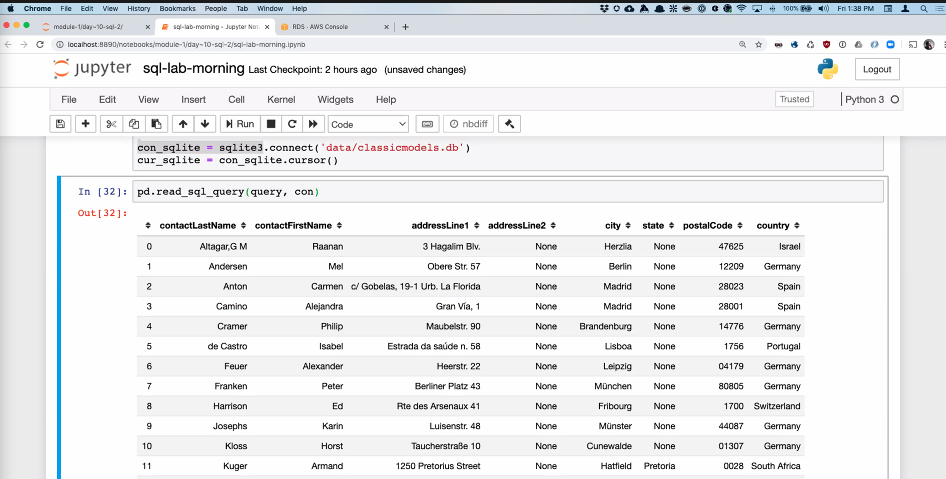

In [37]:
con_sqlite = sqlite3.connect('data/classicmodels.db')
cur_sqlite = con_sqlite.cursor()

AttributeError: 'list' object has no attribute 'connect'

In [20]:
pd.read_sql_query(query, con)

InternalError: Unread result found

2. List the names of all customers that have a creditLimit between 100,000 and 200,000 inclusively. Order by customer name.


3. List all employees who have the initials of M.P. or P.M., by name. Order by last name.

4. List all the products' productNames purchased by Mini Wheels Co. Order the list by product line.

5. List the customers by customerName whose contact person shares either a first name or last name with any of the company's employees Order by customerName

In [75]:
query = """
-- list the customers by customer name
-- whose contact person shares either a first name or last name with any of the company's employee-

SELECT distinct contactFirstName, contactLastName, emp_first.firstName, emp_last.lastName
from customers c
Left join employees emp_first on emp_first.firstName = contactFirstName
Left join employees emp_last on emp_last.lastName = contactLastName

-- get rid of null values where there is no match

where not (emp_first.firstName is Null and emp_last.lastname is null)
-- where (emp_first.firstName is not Null or emp_last.lastname is not null)
order by contactFirstName
"""

pd.read_sql_query(query, con)


,contactFirstName,contactLastName,firstName,lastName
0,Jean,King,None,King
1,Jeff,Young,Jeff,None
2,Jerry,Tseng,None,Tseng
3,Julie,Brown,Julie,None
4,Julie,Young,Julie,None
5,Julie,King,Julie,King
6,Julie,Murphy,Julie,Murphy
7,Leslie,Taylor,Leslie,None
8,Leslie,Murphy,Leslie,Murphy
9,Maria,Hernandez,None,Hernandez


7. List the customers (by name) that are based in the country which is first in the lexicographic order of customer countries. Order by customerName

8. Identify the product(s) by productCode and productName that the company has the least stock of. Order by product code.

9. Identify the offices (by city) that have the least employees and the most employees (answer should include city, numEmps)

In [33]:
query = """
select city, count(*) as employeeCount
from employees
join offices using (officeCode)
group by officeCode, city


having employeeCount in (
	select max(employeeCount)
	from(
	select officeCode, count(*) as employeeCount
		from employees
		group by officeCode) as max_count
	union
    	select min(employeeCount)
	from(
	select officeCode, count(*) as employeeCount
		from employees
		group by officeCode) as min_count
)

"""

pd.read_sql_query(query, con)



,city,employeeCount
0,San Francisco,6
1,Boston,2
2,NYC,2
3,Tokyo,2
4,London,2


10. For all Sales Reps list their names (first and last) and the name of the office they work out of and the number of clients they represent. Order by reverse order of numClients

11. List the customer(s) and their total payments (answer should include customerNumber, customerName, totalPayment where totalPayment is the total amount of dollars the customer has paid). Order by totalPayment.

12. List the product number, product name, and customer name such that the customer has never ordered that product. Order by customerName, productCode.

In [77]:
query = """

-- List the product number
--          product name
--          customer name
-- such that the customer has never ordered that product
-- Order by customerName, productCode 

SELECT all_combos.productCode, all_combos.customerNumber
FROM
(
	SELECT productCode, customerNumber, customerName
	FROM products p
	CROSS JOIN customers c
) all_combos
LEFT JOIN (
    SELECT productCode, customerNumber
    FROM products p
	JOIN orderdetails od USING (productCode)
	JOIN orders o USING (orderNumber)
	JOIN customers c USING (customerNumber)
) good_combos ON all_combos.productCode = good_combos.productCode
              AND all_combos.customerNumber = good_combos.customerNumber
WHERE good_combos.productCode IS NULL


"""

pd.read_sql_query(query, con)


,productCode,customerNumber
0,S10_1949,125
1,S10_4757,125
2,S10_4962,125
3,S12_1099,125
4,S12_1108,125
...,...,...
10883,S24_3420,484
10884,S24_3816,484
10885,S24_4258,484
10886,S32_4289,484


13. List the profit per product that the company would make if it were able to sell all of that product at MSRP (answer should include productName, profit). Order by profit.

14. List the average order size for each customer (answer should include customerName, avgQuantity) Order by customer name.